In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, friedmanchisquare, ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'legend.fontsize': 14,
    'legend.title_fontsize': 13,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.framealpha': 0.9,
    'font.size': 16,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'figure.dpi': 100,
    'savefig.dpi': 300
})

print("="*90)

In [3]:
# ============================================================================
# DATA ORGANIZATION
# ============================================================================

datasets = ['Boston', 'BreastCancer', 'Credit', 'Glass',
            'Haberman', 'Iris', 'SlumpTest', 'Sonar']

# SCENARIO 1: MCAR UNIFORM
mcar_uniform = {
    'MIDA': {
        'RMSE': [0.232, 0.170, 0.353, 0.221, 0.176, 0.445, 0.286, 0.174],
        'MSE': [0.061, 0.055, 0.138, 0.032, 0.040, 0.376, 0.088, 0.049],
        'MAE': [0.158, 0.114, 0.290, 0.202, 0.137, 0.397, 0.249, 0.148],
        'ACC': [0.825, 0.851, 0.613, 0.821, 0.861, 0.430, 0.538, 0.823]
    },
    'OURS': {
        'RMSE': [0.214, 0.131, 0.325, 0.146, 0.238, 0.269, 0.252, 0.187],
        'MSE': [0.054, 0.046, 0.156, 0.035, 0.073, 0.086, 0.073, 0.041],
        'MAE': [0.163, 0.101, 0.277, 0.138, 0.202, 0.207, 0.234, 0.158],
        'ACC': [0.846, 0.865, 0.697, 0.863, 0.806, 0.700, 0.742, 0.831]
    }
}

# SCENARIO 2: MCAR RANDOM
mcar_random = {
    'MIDA': {
        'RMSE': [0.210, 0.139, 0.421, 0.183, 0.296, 0.271, 0.287, 0.148],
        'MSE': [0.055, 0.025, 0.218, 0.039, 0.088, 0.074, 0.087, 0.026],
        'MAE': [0.162, 0.076, 0.367, 0.122, 0.235, 0.196, 0.255, 0.123],
        'ACC': [0.822, 0.913, 0.587, 0.875, 0.500, 0.889, 0.783, 0.857]
    },
    'OURS': {
        'RMSE': [0.219, 0.287, 0.303, 0.165, 0.203, 0.255, 0.214, 0.184],
        'MSE': [0.052, 0.109, 0.117, 0.036, 0.052, 0.081, 0.058, 0.039],
        'MAE': [0.168, 0.199, 0.277, 0.114, 0.172, 0.211, 0.200, 0.152],
        'ACC': [0.828, 0.816, 0.753, 0.805, 0.800, 0.875, 0.729, 0.835]
    }
}

# SCENARIO 3: MNAR UNIFORM
mnar_uniform = {
    'MIDA': {
        'RMSE': [0.174, 0.128, 0.290, 0.142, 0.197, 0.177, 0.208, 0.138],
        'MSE': [0.045, 0.020, 0.138, 0.032, 0.041, 0.048, 0.058, 0.030],
        'MAE': [0.149, 0.087, 0.253, 0.126, 0.176, 0.156, 0.195, 0.125],
        'ACC': [0.790, 0.981, 0.765, 0.833, 0.875, 0.750, 0.667, 0.876]
    },
    'OURS': {
        'RMSE': [0.151, 0.145, 0.311, 0.145, 0.193, 0.083, 0.142, 0.169],
        'MSE': [0.028, 0.036, 0.164, 0.031, 0.051, 0.008, 0.031, 0.042],
        'MAE': [0.137, 0.126, 0.292, 0.132, 0.170, 0.078, 0.142, 0.157],
        'ACC': [0.801, 0.936, 0.731, 0.888, 0.879, 0.991, 0.750, 0.852]
    }
}

# SCENARIO 4: MNAR RANDOM
mnar_random = {
    'MIDA': {
        'RMSE': [0.129, 0.122, 0.212, 0.173, 0.143, 0.194, 0.255, 0.121],
        'MSE': [0.018, 0.021, 0.049, 0.033, 0.026, 0.040, 0.073, 0.021],
        'MAE': [0.100, 0.101, 0.188, 0.168, 0.112, 0.187, 0.251, 0.112],
        'ACC': [0.875, 0.944, 0.743, 0.750, 0.991, 0.500, 0.750, 0.875]
    },
    'OURS': {
        'RMSE': [0.153, 0.218, 0.301, 0.201, 0.159, 0.047, 0.188, 0.163],
        'MSE': [0.032, 0.049, 0.116, 0.050, 0.027, 0.002, 0.052, 0.036],
        'MAE': [0.139, 0.180, 0.290, 0.175, 0.148, 0.047, 0.179, 0.153],
        'ACC': [0.867, 0.928, 0.729, 0.875, 0.750, 0.996, 0.667, 0.873]
    }
}

scenarios = {
    'MCAR-Uniform': mcar_uniform,
    'MCAR-Random': mcar_random,
    'MNAR-Uniform': mnar_uniform,
    'MNAR-Random': mnar_random
}

In [4]:
# ============================================================================
# 1. OVERALL PERFORMANCE SUMMARY
# ============================================================================
print("\n1. OVERALL PERFORMANCE SUMMARY")
print("-" * 90)

summary_data = []
for scenario_name, scenario_data in scenarios.items():
    for metric in ['RMSE', 'MSE', 'MAE', 'ACC']:
        mida_vals = np.array(scenario_data['MIDA'][metric])
        ours_vals = np.array(scenario_data['OURS'][metric])

        summary_data.append({
            'Scenario': scenario_name,
            'Metric': metric,
            'MIDA_Mean': np.mean(mida_vals),
            'OURS_Mean': np.mean(ours_vals),
            'MIDA_Std': np.std(mida_vals, ddof=1),
            'OURS_Std': np.std(ours_vals, ddof=1),
            'Diff': np.mean(ours_vals) - np.mean(mida_vals),
            'Pct_Change': ((np.mean(ours_vals) - np.mean(mida_vals)) / np.mean(mida_vals) * 100)
        })

summary_df = pd.DataFrame(summary_data)
print("\nMean Performance by Scenario and Metric:")
print(summary_df.to_string(index=False))


1. OVERALL PERFORMANCE SUMMARY
------------------------------------------------------------------------------------------

Mean Performance by Scenario and Metric:
    Scenario Metric  MIDA_Mean  OURS_Mean  MIDA_Std  OURS_Std      Diff  Pct_Change
MCAR-Uniform   RMSE   0.257125   0.220250  0.098808  0.064692 -0.036875  -14.341274
MCAR-Uniform    MSE   0.104875   0.070500  0.114608  0.038851 -0.034375  -32.777116
MCAR-Uniform    MAE   0.211875   0.185000  0.095632  0.056209 -0.026875  -12.684366
MCAR-Uniform    ACC   0.720250   0.793750  0.167992  0.070678  0.073500   10.204790
 MCAR-Random   RMSE   0.244375   0.228750  0.093906  0.048752 -0.015625   -6.393862
 MCAR-Random    MSE   0.076500   0.068000  0.062498  0.031002 -0.008500  -11.111111
 MCAR-Random    MAE   0.192000   0.186625  0.092949  0.048000 -0.005375   -2.799479
 MCAR-Random    ACC   0.778250   0.805125  0.152091  0.046221  0.026875    3.453261
MNAR-Uniform   RMSE   0.181750   0.167375  0.052243  0.065813 -0.014375   -7.90

In [5]:
# ============================================================================
# 2. RMSE FOCUSED ANALYSIS (Primary Metric)
# ============================================================================
print("\n\n2. RMSE-FOCUSED STATISTICAL ANALYSIS")
print("-" * 90)

rmse_results = []
for scenario_name, scenario_data in scenarios.items():
    mida_rmse = np.array(scenario_data['MIDA']['RMSE'])
    ours_rmse = np.array(scenario_data['OURS']['RMSE'])

    # Wilcoxon signed-rank test
    try:
        w_stat, w_pval = wilcoxon(ours_rmse, mida_rmse, alternative='less')
    except:
        w_stat, w_pval = 0, 1.0

    # Paired t-test
    t_stat, t_pval = ttest_rel(ours_rmse, mida_rmse)

    # Effect size (Cohen's d)
    diff = ours_rmse - mida_rmse
    cohens_d = np.mean(diff) / np.std(diff, ddof=1)

    # Win/Loss
    wins = np.sum(ours_rmse < mida_rmse)
    losses = np.sum(ours_rmse > mida_rmse)
    ties = np.sum(ours_rmse == mida_rmse)

    # Percentage improvement
    pct_improvement = ((np.mean(mida_rmse) - np.mean(ours_rmse)) / np.mean(mida_rmse)) * 100

    rmse_results.append({
        'Scenario': scenario_name,
        'MIDA_Mean': np.mean(mida_rmse),
        'OURS_Mean': np.mean(ours_rmse),
        'Wilcoxon_W': w_stat,
        'Wilcoxon_p': w_pval,
        't_stat': t_stat,
        't_pval': t_pval,
        'Cohen_d': cohens_d,
        'Wins': wins,
        'Losses': losses,
        'Ties': ties,
        '% Improve': pct_improvement
    })

rmse_df = pd.DataFrame(rmse_results)
print("\nRMSE Statistical Comparison:")
print(rmse_df.to_string(index=False))

# Significance summary
print("\nSignificance Summary (α=0.05):")
for _, row in rmse_df.iterrows():
    sig = "***" if row['Wilcoxon_p'] < 0.001 else "**" if row['Wilcoxon_p'] < 0.01 else "*" if row['Wilcoxon_p'] < 0.05 else "n.s."
    direction = "OURS BETTER" if row['OURS_Mean'] < row['MIDA_Mean'] else "MIDA BETTER"
    print(f"  {row['Scenario']:15s}: p={row['Wilcoxon_p']:.4f} {sig:4s} | {direction} | d={row['Cohen_d']:+.2f} | W/L={row['Wins']}/{row['Losses']}")



2. RMSE-FOCUSED STATISTICAL ANALYSIS
------------------------------------------------------------------------------------------

RMSE Statistical Comparison:
    Scenario  MIDA_Mean  OURS_Mean  Wilcoxon_W  Wilcoxon_p    t_stat   t_pval   Cohen_d  Wins  Losses  Ties  % Improve
MCAR-Uniform   0.257125   0.220250         7.0    0.074219 -1.507191 0.175491 -0.532873     6       2     0  14.341274
 MCAR-Random   0.244375   0.228750        13.0    0.273438 -0.523910 0.616515 -0.185230     5       3     0   6.393862
MNAR-Uniform   0.181750   0.167375        14.0    0.320312 -0.916255 0.390007 -0.323945     4       4     0   7.909216
 MNAR-Random   0.168625   0.178750        23.0    0.769531  0.354063 0.733717  0.125180     2       6     0  -6.004448

Significance Summary (α=0.05):
  MCAR-Uniform   : p=0.0742 n.s. | OURS BETTER | d=-0.53 | W/L=6/2
  MCAR-Random    : p=0.2734 n.s. | OURS BETTER | d=-0.19 | W/L=5/3
  MNAR-Uniform   : p=0.3203 n.s. | OURS BETTER | d=-0.32 | W/L=4/4
  MNAR-Rando

In [6]:
# ============================================================================
# 3. DATASET-SPECIFIC PERFORMANCE (RMSE)
# ============================================================================
print("\n\n3. DATASET-SPECIFIC RMSE PERFORMANCE")
print("-" * 90)

dataset_performance = []
for dataset_idx, dataset_name in enumerate(datasets):
    row_data = {'Dataset': dataset_name}

    for scenario_name, scenario_data in scenarios.items():
        mida_val = scenario_data['MIDA']['RMSE'][dataset_idx]
        ours_val = scenario_data['OURS']['RMSE'][dataset_idx]
        diff = ours_val - mida_val
        pct = (diff / mida_val) * 100

        winner = "OURS" if ours_val < mida_val else "MIDA" if ours_val > mida_val else "TIE"
        row_data[f'{scenario_name}_MIDA'] = mida_val
        row_data[f'{scenario_name}_OURS'] = ours_val
        row_data[f'{scenario_name}_Diff'] = diff
        row_data[f'{scenario_name}_Winner'] = winner

    dataset_performance.append(row_data)

dataset_df = pd.DataFrame(dataset_performance)
print("\nDataset Performance Across Scenarios:")
for dataset in datasets:
    data = dataset_df[dataset_df['Dataset'] == dataset].iloc[0]
    print(f"\n{dataset}:")
    for scenario_name in scenarios.keys():
        mida = data[f'{scenario_name}_MIDA']
        ours = data[f'{scenario_name}_OURS']
        winner = data[f'{scenario_name}_Winner']
        diff = data[f'{scenario_name}_Diff']
        print(f"  {scenario_name:15s}: MIDA={mida:.3f}, OURS={ours:.3f} | Δ={diff:+.3f} | Winner: {winner}")



3. DATASET-SPECIFIC RMSE PERFORMANCE
------------------------------------------------------------------------------------------

Dataset Performance Across Scenarios:

Boston:
  MCAR-Uniform   : MIDA=0.232, OURS=0.214 | Δ=-0.018 | Winner: OURS
  MCAR-Random    : MIDA=0.210, OURS=0.219 | Δ=+0.009 | Winner: MIDA
  MNAR-Uniform   : MIDA=0.174, OURS=0.151 | Δ=-0.023 | Winner: OURS
  MNAR-Random    : MIDA=0.129, OURS=0.153 | Δ=+0.024 | Winner: MIDA

BreastCancer:
  MCAR-Uniform   : MIDA=0.170, OURS=0.131 | Δ=-0.039 | Winner: OURS
  MCAR-Random    : MIDA=0.139, OURS=0.287 | Δ=+0.148 | Winner: MIDA
  MNAR-Uniform   : MIDA=0.128, OURS=0.145 | Δ=+0.017 | Winner: MIDA
  MNAR-Random    : MIDA=0.122, OURS=0.218 | Δ=+0.096 | Winner: MIDA

Credit:
  MCAR-Uniform   : MIDA=0.353, OURS=0.325 | Δ=-0.028 | Winner: OURS
  MCAR-Random    : MIDA=0.421, OURS=0.303 | Δ=-0.118 | Winner: OURS
  MNAR-Uniform   : MIDA=0.290, OURS=0.311 | Δ=+0.021 | Winner: MIDA
  MNAR-Random    : MIDA=0.212, OURS=0.301 | Δ=+0.0

In [7]:
# =============================================================================
# 4. AGGREGATE WIN/LOSS ACROSS ALL SCENARIOS
# ============================================================================
print("\n\n4. AGGREGATE WIN/LOSS SUMMARY")
print("-" * 90)

total_comparisons = len(datasets) * len(scenarios)
total_wins = rmse_df['Wins'].sum()
total_losses = rmse_df['Losses'].sum()
total_ties = rmse_df['Ties'].sum()

print(f"Total comparisons: {total_comparisons}")
print(f"OURS wins:   {total_wins}/{total_comparisons} ({total_wins/total_comparisons*100:.1f}%)")
print(f"MIDA wins:   {total_losses}/{total_comparisons} ({total_losses/total_comparisons*100:.1f}%)")
print(f"Ties:        {total_ties}/{total_comparisons} ({total_ties/total_comparisons*100:.1f}%)")

print("\nPer-scenario breakdown:")
for _, row in rmse_df.iterrows():
    total = row['Wins'] + row['Losses'] + row['Ties']
    print(f"  {row['Scenario']:15s}: OURS {row['Wins']}/{total} ({row['Wins']/total*100:.1f}%), "
          f"MIDA {row['Losses']}/{total} ({row['Losses']/total*100:.1f}%)")



4. AGGREGATE WIN/LOSS SUMMARY
------------------------------------------------------------------------------------------
Total comparisons: 32
OURS wins:   17/32 (53.1%)
MIDA wins:   15/32 (46.9%)
Ties:        0/32 (0.0%)

Per-scenario breakdown:
  MCAR-Uniform   : OURS 6/8 (75.0%), MIDA 2/8 (25.0%)
  MCAR-Random    : OURS 5/8 (62.5%), MIDA 3/8 (37.5%)
  MNAR-Uniform   : OURS 4/8 (50.0%), MIDA 4/8 (50.0%)
  MNAR-Random    : OURS 2/8 (25.0%), MIDA 6/8 (75.0%)


In [8]:
from scipy.stats import friedmanchisquare, wilcoxon, ttest_rel

# ============================================================================
# 5. FRIEDMAN / WILCOXON TEST ACROSS SCENARIOS
# ============================================================================
print("\n\n5. FRIEDMAN TEST (Methods differ across scenarios?)")
print("-" * 90)

all_mida = []
all_ours = []
for scenario_data in scenarios.values():
    all_mida.extend(scenario_data['MIDA']['RMSE'])
    all_ours.extend(scenario_data['OURS']['RMSE'])

# Check how many methods you have
num_methods = len(scenarios[list(scenarios.keys())[0]].keys())

if num_methods >= 3:
    # For ≥3 methods → use Friedman
    friedman_stat, friedman_p = friedmanchisquare(*[scenario_data[m]['RMSE'] for m in scenarios[list(scenarios.keys())[0]].keys()])
    print(f"Friedman χ²({num_methods - 1}) = {friedman_stat:.4f}")
    print(f"p-value = {friedman_p:.6f}")
    if friedman_p < 0.05:
        print("Result: SIGNIFICANT - Methods differ significantly ✓")
    else:
        print("Result: NOT SIGNIFICANT")
else:
    # For 2 methods → use Wilcoxon signed-rank test
    stat, p = wilcoxon(all_mida, all_ours)
    print(f"Wilcoxon signed-rank test statistic = {stat:.4f}")
    print(f"p-value = {p:.6f}")
    if p < 0.05:
        print("Result: SIGNIFICANT - Methods differ significantly ✓")
    else:
        print("Result: NOT SIGNIFICANT")



5. FRIEDMAN TEST (Methods differ across scenarios?)
------------------------------------------------------------------------------------------
Wilcoxon signed-rank test statistic = 211.5000
p-value = 0.326240
Result: NOT SIGNIFICANT


In [9]:
# Data
datasets = ['Boston', 'BreastCancer', 'Credit',
            'Glass', 'Haberman', 'Iris', 'SlumpTest', 'Sonar']

scenarios_data = {
    'MCAR-Uniform': {
        'MIDA': [0.232, 0.170, 0.353, 0.221, 0.176, 0.445, 0.286, 0.174],
        'OURS': [0.214, 0.131, 0.325, 0.146, 0.238, 0.269, 0.252, 0.187]
    },
    'MCAR-Random': {
        'MIDA': [0.210, 0.139, 0.421, 0.183, 0.296, 0.271, 0.287, 0.148],
        'OURS': [0.219, 0.287, 0.303, 0.165, 0.203, 0.255, 0.214, 0.184]
    },
    'MNAR-Uniform': {
        'MIDA': [0.174, 0.128, 0.290, 0.142, 0.197, 0.177, 0.208, 0.138],
        'OURS': [0.151, 0.145, 0.311, 0.145, 0.193, 0.083, 0.142, 0.169]
    },
    'MNAR-Random': {
        'MIDA': [0.129, 0.122, 0.212, 0.173, 0.143, 0.194, 0.255, 0.121],
        'OURS': [0.153, 0.218, 0.301, 0.201, 0.159, 0.047, 0.188, 0.163]
    }
}

✓ Saved: panelA_Mean_RMSE_by_Scenario.pdf/png


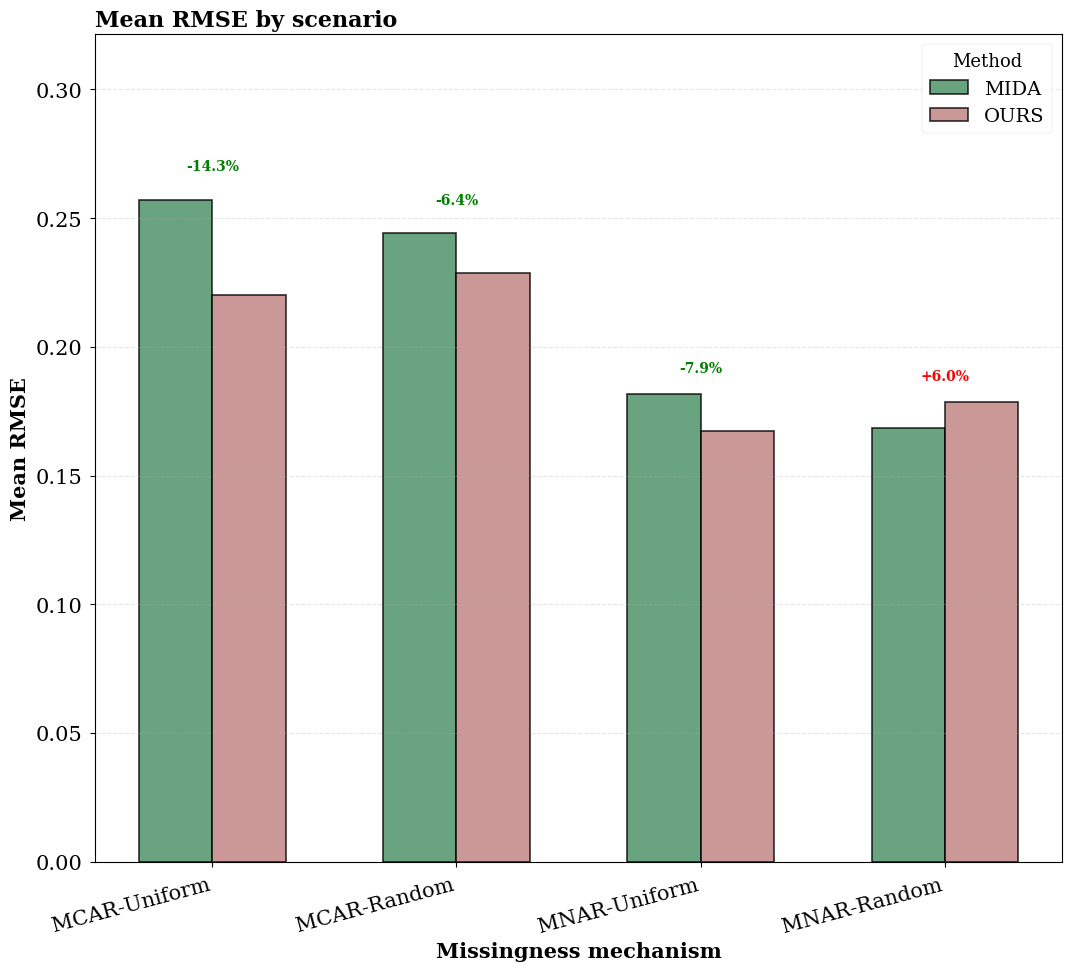

In [10]:
colors = {'MIDA': '#458C5F', 'OURS': '#BF7E7E'}

# ============================================================================
# RMSE by Scenario and Method (Improved Label Placement)
# ============================================================================
fig_a, ax1 = plt.subplots(figsize=(11, 10))
scenario_names = list(scenarios_data.keys())
x = np.arange(len(scenario_names))
width = 0.3

mida_means = [np.mean(scenarios_data[s]['MIDA']) for s in scenario_names]
ours_means = [np.mean(scenarios_data[s]['OURS']) for s in scenario_names]

# Bars
bars1 = ax1.bar(x - width/2, mida_means, width, label='MIDA',
                color=colors['MIDA'], alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax1.bar(x + width/2, ours_means, width, label='OURS',
                color=colors['OURS'], alpha=0.8, edgecolor='black', linewidth=1.2)

# Add labels with adaptive offsets
for i, (m, o) in enumerate(zip(mida_means, ours_means)):
    # RMSE values
    #ax1.text(i - width/2, m + 0.005, f'{m:.3f}',
    #         ha='center', va='bottom', fontsize=9, fontweight='bold')
    #ax1.text(i + width/2, o + 0.005, f'{o:.3f}',
    #         ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Percentage difference
    pct_diff = ((o - m) / m) * 100
    color_text = 'green' if pct_diff < 0 else 'red'
    offset = 0.04 * max(m, o)  # dynamic vertical space based on bar height
    ax1.text(i, max(m, o) + offset, f'{pct_diff:+.1f}%',
             ha='center', va='bottom', fontsize=10,
             color=color_text, fontweight='bold')

# ---- Ensure text is visible by adjusting y-limits ----
y_max = max(max(mida_means), max(ours_means))
ax1.set_ylim(0, y_max * 1.25)  # add headroom for labels

# Axis labels & aesthetics
ax1.set_xlabel('Missingness mechanism', fontweight='bold')
ax1.set_ylabel('Mean RMSE', fontweight='bold')
ax1.set_title('Mean RMSE by scenario', fontweight='bold', loc='left') #, fontsize=13)
ax1.set_xticks(x)
ax1.set_xticklabels(scenario_names, rotation=15, ha='right')
ax1.legend(title='Method', loc='upper right', framealpha=0.9)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()

# Save paths
plt.savefig("/content/drive/MyDrive/MIDA-our/Results/figures/panelA_Mean_RMSE_by_Scenario.pdf",
            bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/MIDA-our/Results/figures/panelA_Mean_RMSE_by_Scenario.png",
            dpi=300, bbox_inches='tight')
print("✓ Saved: panelA_Mean_RMSE_by_Scenario.pdf/png")
plt.show()


Generating detailed scenario plots one by one...
✓ Saved: MCAR-Uniform_detailed_comparison.pdf/png


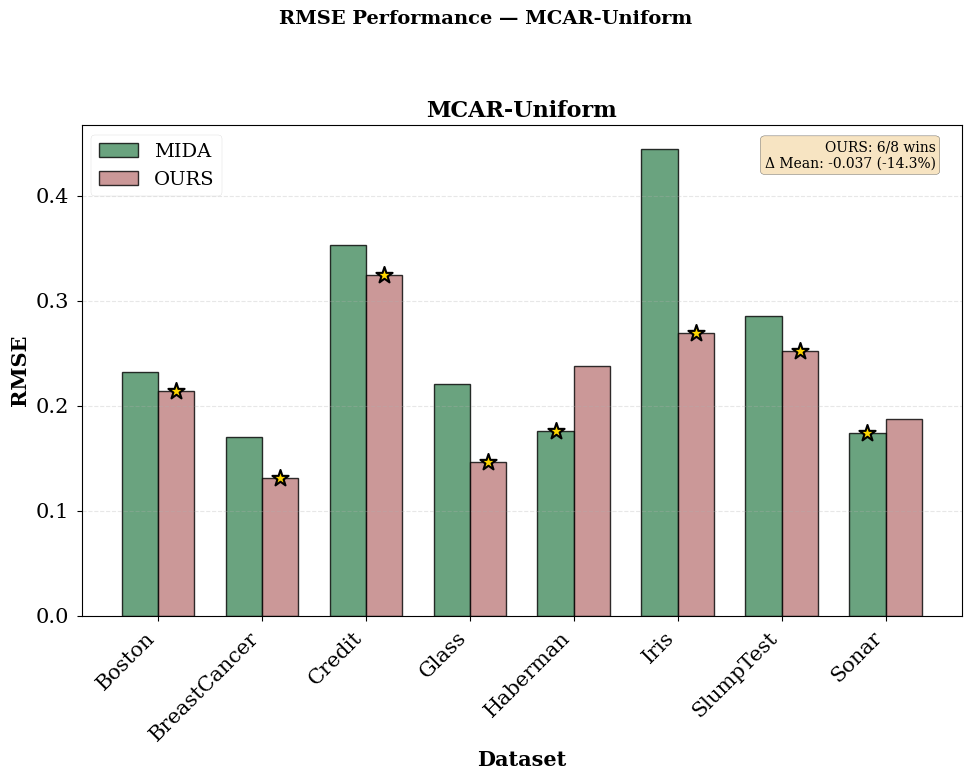

✓ Saved: MCAR-Random_detailed_comparison.pdf/png


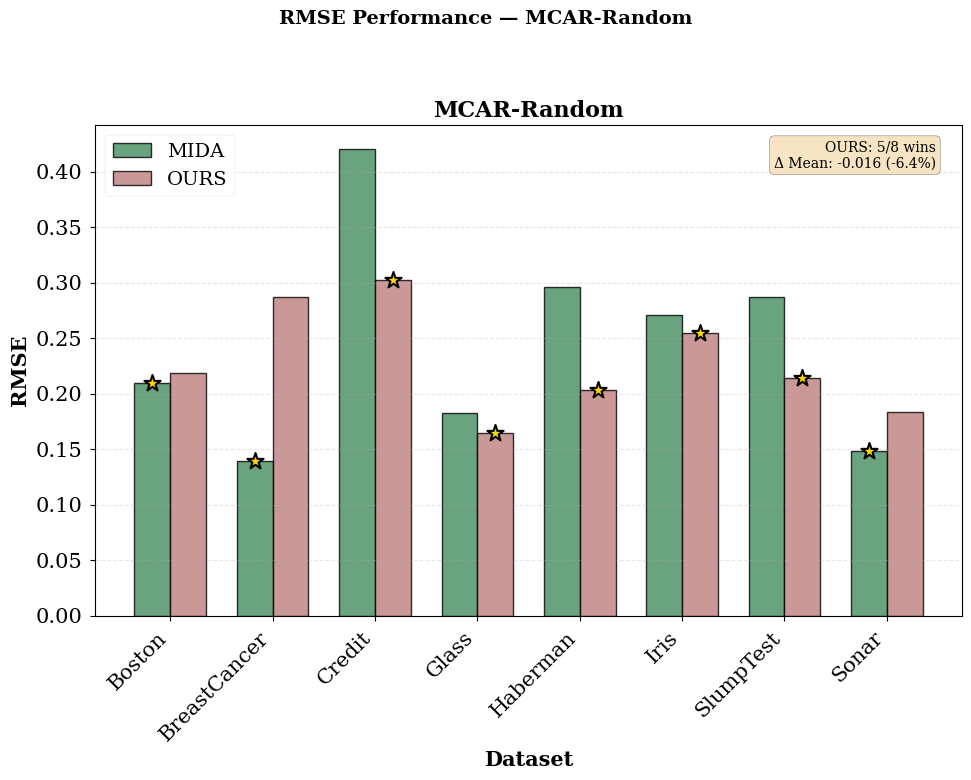

✓ Saved: MNAR-Uniform_detailed_comparison.pdf/png


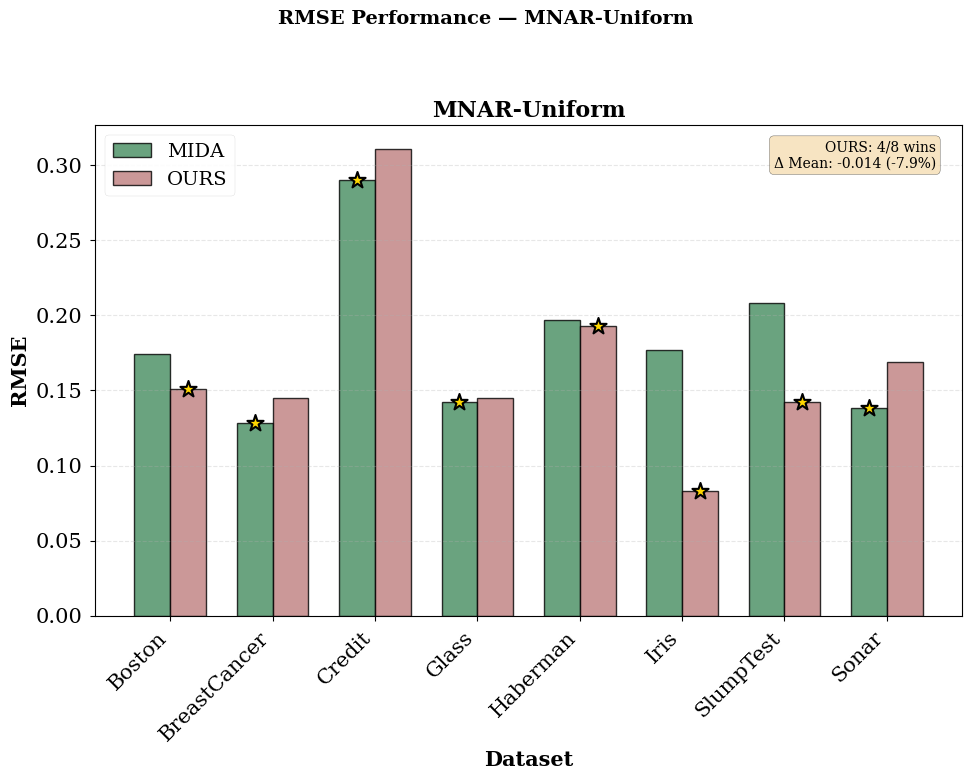

✓ Saved: MNAR-Random_detailed_comparison.pdf/png


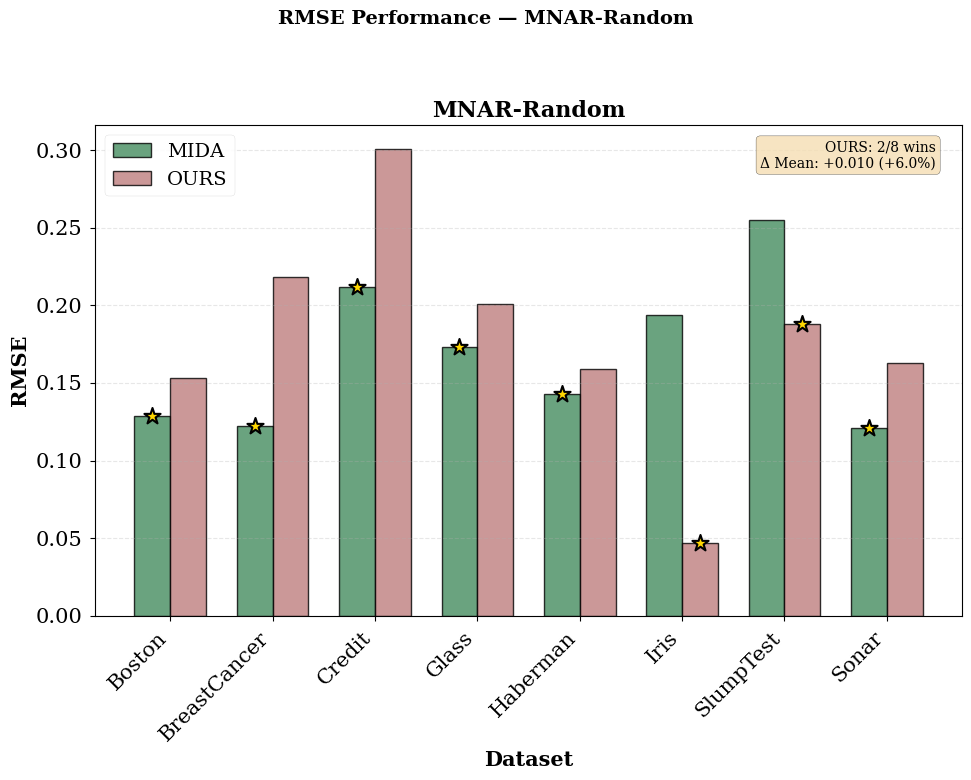

In [11]:
# ============================================================================
# DETAILED SCENARIO COMPARISON (SEPARATE PLOTS)
# ============================================================================
print("\nGenerating detailed scenario plots one by one...")

for scenario_name in scenario_names:
    mida_vals = scenarios_data[scenario_name]['MIDA']
    ours_vals = scenarios_data[scenario_name]['OURS']

    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle(f'RMSE Performance — {scenario_name}', fontsize=14, fontweight='bold')

    x_pos = np.arange(len(datasets))
    width = 0.35

    # Plot bars
    bars1 = ax.bar(x_pos - width/2, mida_vals, width, label='MIDA',
                   color=colors['MIDA'], alpha=0.8, edgecolor='black', linewidth=1)
    bars2 = ax.bar(x_pos + width/2, ours_vals, width, label='OURS',
                   color=colors['OURS'], alpha=0.8, edgecolor='black', linewidth=1)

    # Highlight winners with stars
    for i, (m, o) in enumerate(zip(mida_vals, ours_vals)):
        if o < m:
            ax.scatter(i + width/2, o, s=150, marker='*',
                       color='gold', edgecolors='black', linewidths=1.5, zorder=10)
        elif m < o:
            ax.scatter(i - width/2, m, s=150, marker='*',
                       color='gold', edgecolors='black', linewidths=1.5, zorder=10)

    # Labels & ticks
    ax.set_xlabel('Dataset', fontweight='bold')
    ax.set_ylabel('RMSE', fontweight='bold')
    ax.set_title(f'{scenario_name}', fontweight='bold') #, fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(datasets, rotation=45, ha='right') #, fontsize=9)
    ax.legend(loc='upper left') #, fontsize=9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add stats box
    wins = np.sum(np.array(ours_vals) < np.array(mida_vals))
    mean_diff = np.mean(np.array(ours_vals) - np.array(mida_vals))
    pct_diff = (mean_diff / np.mean(mida_vals)) * 100
    stats_text = f'OURS: {wins}/{len(datasets)} wins\nΔ Mean: {mean_diff:+.3f} ({pct_diff:+.1f}%)'

    ax.text(0.97, 0.97, stats_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Layout and save
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # Update save paths
    plt.savefig(f"/content/drive/MyDrive/MIDA-our/Results/figures/{scenario_name.replace(' ', '_')}_detailed_comparison.pdf", bbox_inches='tight')
    plt.savefig(f"/content/drive/MyDrive/MIDA-our/Results/figures/{scenario_name.replace(' ', '_')}_detailed_comparison.png", dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {scenario_name.replace(' ', '_')}_detailed_comparison.pdf/png")
    plt.show()

✓ Saved: mida_ours_statistics_boxplot.pdf/png


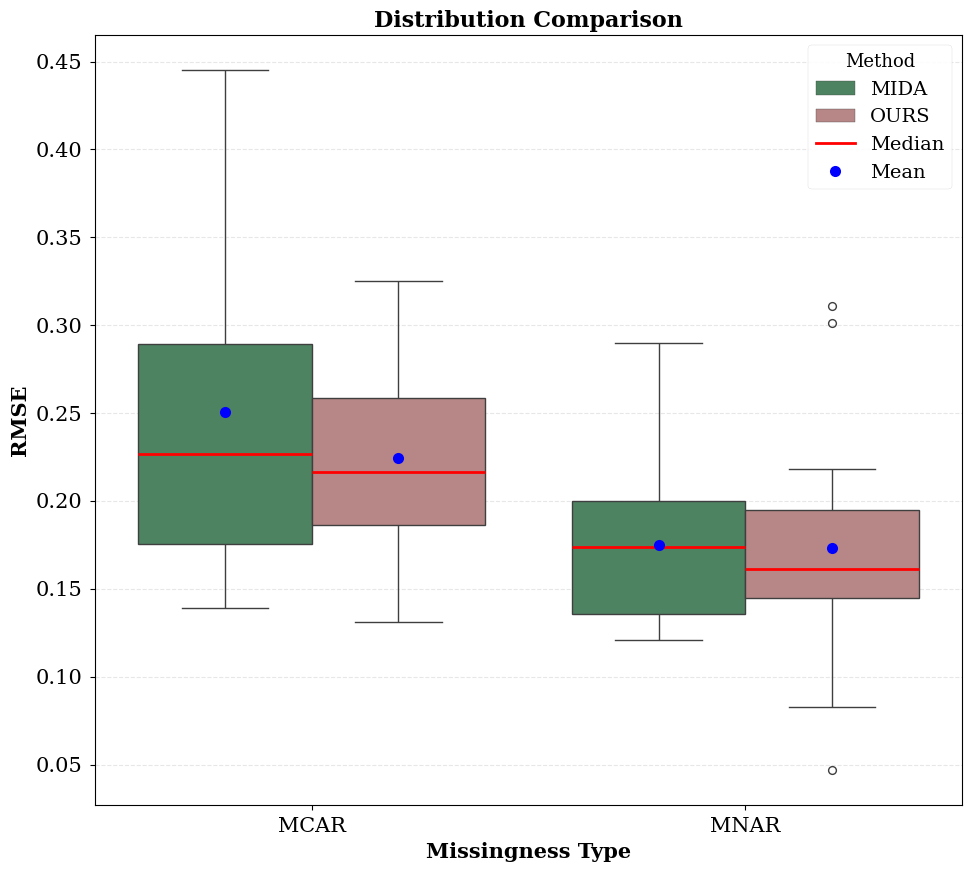

In [12]:
from scipy.stats import wilcoxon
from matplotlib.patches import Patch

# ============================================================================
# STATISTICAL SUMMARY VISUALIZATION (SEPARATE PLOTS)
# ----------------------------------------------------------
# Boxplot comparison
# ----------------------------------------------------------
all_mida, all_ours, scenario_labels = [], [], []
for scenario_name in scenario_names:
    all_mida.extend(scenarios_data[scenario_name]['MIDA'])
    all_ours.extend(scenarios_data[scenario_name]['OURS'])
    scenario_labels.extend([scenario_name.split('-')[0]] * len(datasets))

data_for_box = pd.DataFrame({
    'RMSE': all_mida + all_ours,
    'Method': ['MIDA'] * len(all_mida) + ['OURS'] * len(all_ours),
    'Mechanism': scenario_labels * 2
})


fig, ax = plt.subplots(figsize=(10, 9))
sns.boxplot(
    data=data_for_box, x='Mechanism', y='RMSE', hue='Method',
    palette={'MIDA': colors['MIDA'], 'OURS': colors['OURS']}, ax=ax,
    showmeans=True,
    meanprops={
        'marker':'o',
        'markerfacecolor':'blue',
        'markeredgecolor':'blue',
        'markersize':'8'
    },
    medianprops={
        'color': 'red',
        'linewidth': 2
    }
)

ax.set_xlabel('Missingness Type', fontweight='bold')
ax.set_ylabel('RMSE', fontweight='bold')
ax.set_title('Distribution Comparison', fontweight='bold') #, fontsize=12)
ax.legend(title='Method', loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adding custom legend entries for median and mean, as sns.boxplot doesn't add them automatically
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', lw=2, label='Median'))
handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markeredgecolor='blue', markersize=8, label='Mean'))
ax.legend(handles=handles, title='Method', loc='upper right')

plt.tight_layout()
# Update save paths
plt.savefig("/content/drive/MyDrive/MIDA-our/Results/figures/mida_ours_statistics_boxplot.pdf", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/MIDA-our/Results/figures/mida_ours_statistics_boxplot.png", dpi=300, bbox_inches='tight')
print("✓ Saved: mida_ours_statistics_boxplot.pdf/png")
plt.show()

✓ Saved: mida_ours_statistics_scatter.pdf/png


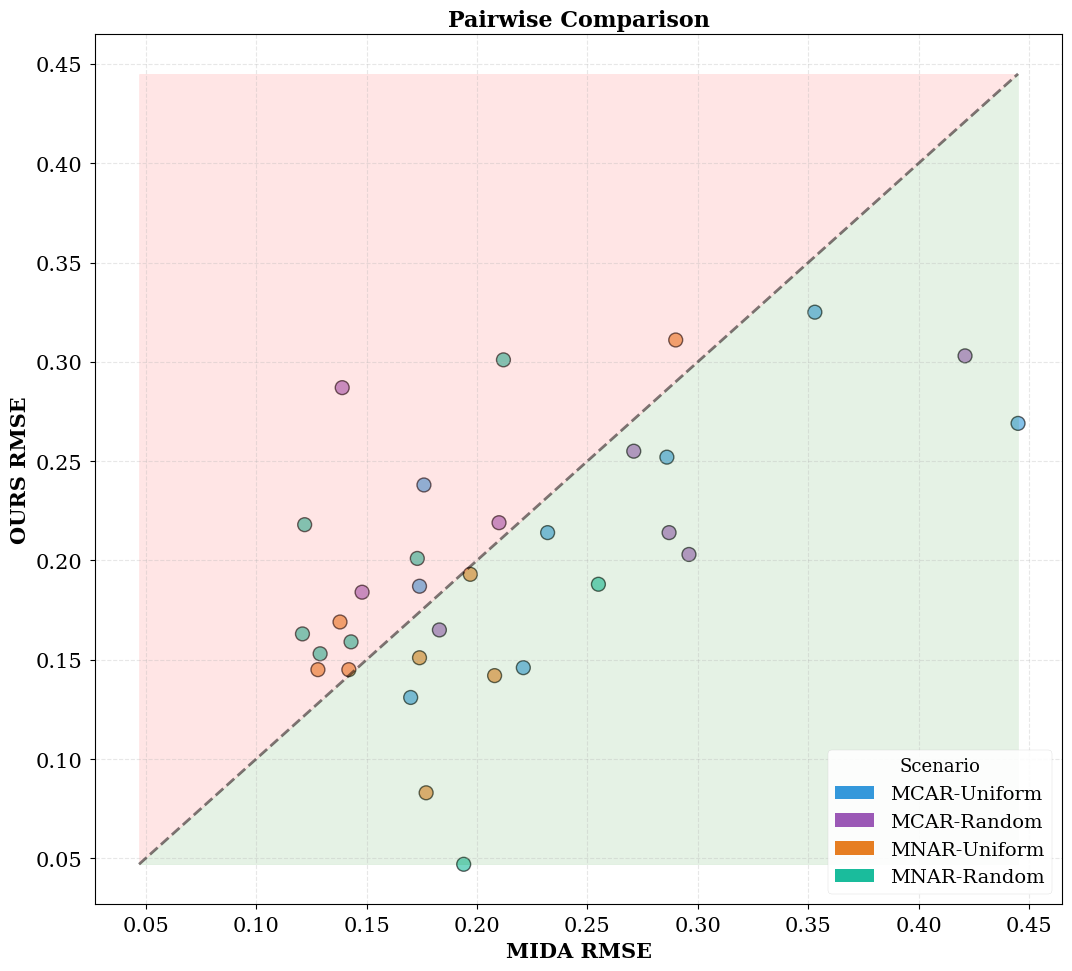

In [13]:
# ----------------------------------------------------------
#  — Scatter plot: MIDA vs OURS
# ----------------------------------------------------------
color_map = {
    'MCAR-Uniform': '#3498db', 'MCAR-Random': '#9b59b6',
    'MNAR-Uniform': '#e67e22', 'MNAR-Random': '#1abc9c'
}

all_mida_vals, all_ours_vals, colors_scatter = [], [], []
for scenario_name in scenario_names:
    all_mida_vals.extend(scenarios_data[scenario_name]['MIDA'])
    all_ours_vals.extend(scenarios_data[scenario_name]['OURS'])
    colors_scatter.extend([color_map[scenario_name]] * len(datasets))

fig, ax = plt.subplots(figsize=(11, 10))
ax.scatter(all_mida_vals, all_ours_vals, c=colors_scatter,
           s=100, alpha=0.6, edgecolors='black', linewidths=1)

# Diagonal (equal performance)
max_val = max(max(all_mida_vals), max(all_ours_vals))
min_val = min(min(all_mida_vals), min(all_ours_vals))
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2,
        alpha=0.5, label='Equal Performance')

# Regions
ax.fill_between([min_val, max_val], [min_val, max_val], max_val,
                alpha=0.1, color='red', label='MIDA Better')
ax.fill_between([min_val, max_val], min_val, [min_val, max_val],
                alpha=0.1, color='green', label='OURS Better')

ax.set_xlabel('MIDA RMSE', fontweight='bold')
ax.set_ylabel('OURS RMSE', fontweight='bold')
ax.set_title('Pairwise Comparison',
             fontweight='bold') #, fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')

# Custom legend for scenarios
legend_elements = [Patch(facecolor=color_map[s], label=s) for s in scenario_names]
ax.legend(handles=legend_elements, loc='lower right', title='Scenario') #, fontsize=8

plt.tight_layout()
# Update save paths
plt.savefig("/content/drive/MyDrive/MIDA-our/Results/figures/mida_ours_statistics_scatter.pdf", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/MIDA-our/Results/figures/mida_ours_statistics_scatter.png", dpi=300, bbox_inches='tight')
print("✓ Saved: mida_ours_statistics_scatter.pdf/png")
plt.show()